# Dimensionality Reduction

In [98]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import umap

In [33]:
%matplotlib inline
sns.set()
sns.set(rc={"figure.figsize": (15, 12)})

In [34]:
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

In [35]:
RANDOM_STATE = 42

## Defining plotting functions

In [63]:
def plot_2d(x, y, c, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")

    plt.scatter(x, y,
        c=c,
        cmap=CMAP,
        s=70)

    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [64]:
def plot_3d(x, y, z, c, title):
    sns.set_style('whitegrid')

    fig = plt.figure(1, figsize=(15, 12))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter(x, y, z,
               c=c,
               cmap=CMAP,
               s=40)

    ax.set_title(title, fontsize=20, y=1.03)

    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    plt.show()

## Create Dataset

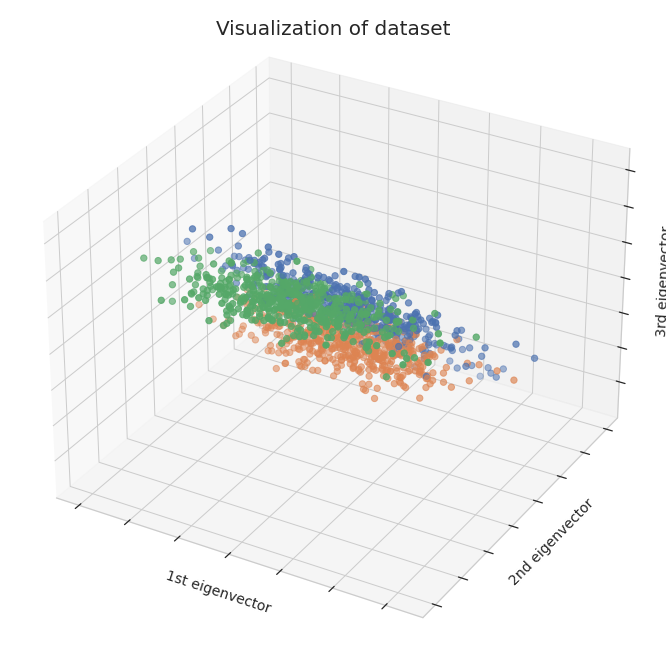

In [88]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1,
    )

plot_3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    c=y,
    title = "Visualization of dataset")

### 2D Plotting with PCA

In [89]:
pca = PCA(n_components=2)
points = pca.fit_transform(X)

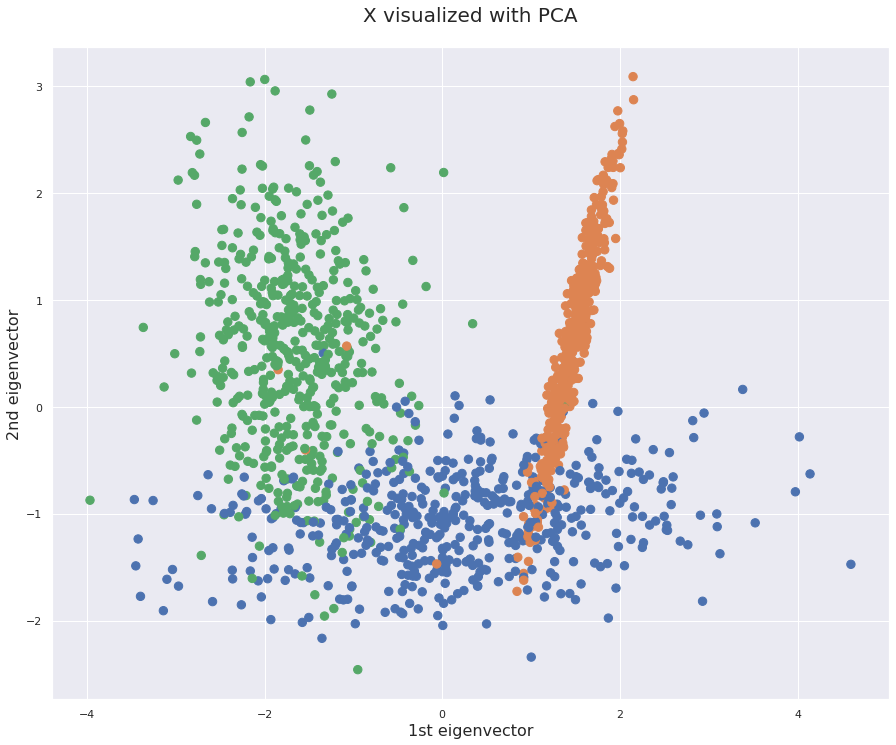

In [90]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    c = y,
    title = 'X visualized with PCA')

### 2D plotting with t-SNE

In [91]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(X)

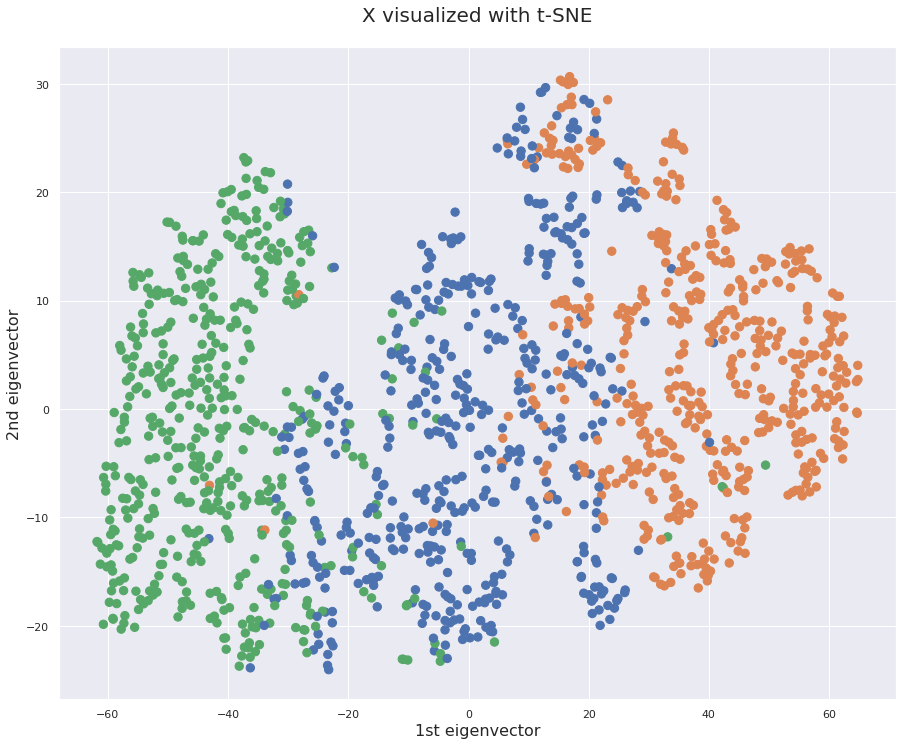

In [92]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'X visualized with t-SNE')

Kullback-Leibler (KL) divergence between the high-dimensional probability distribution and the low-dimensional probability distribution. Low KL divergence is a sign of better results

In [97]:
tsne.kl_divergence_

1.0192739963531494

### 2D plotting with UMAP

In [95]:
map = umap.UMAP(n_neighbors=10, n_components=2, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

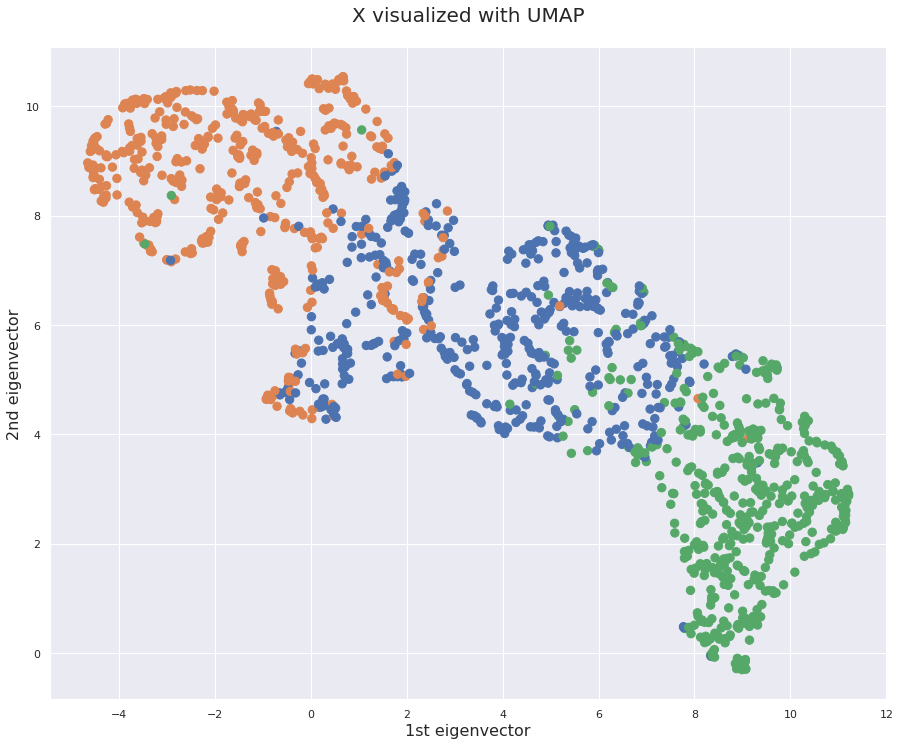

In [96]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'X visualized with UMAP')

### 3D plotting with PCA

In [105]:
pca = PCA(n_components=3)
points = pca.fit_transform(X)

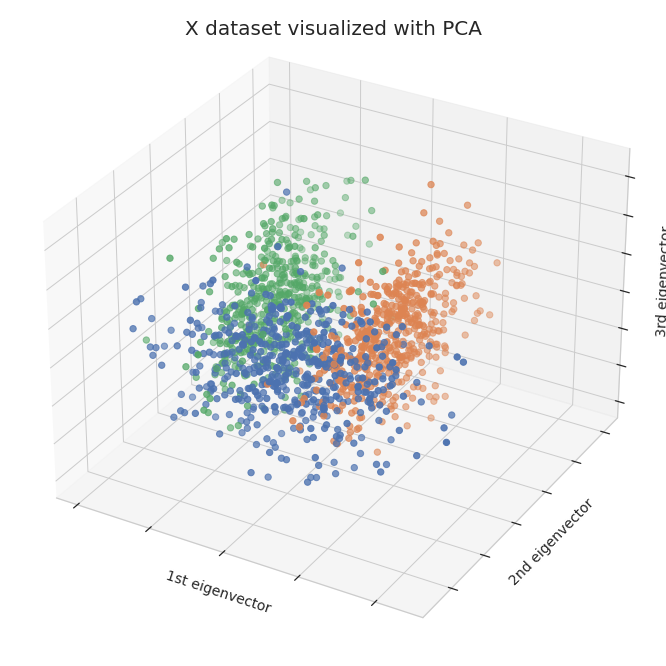

In [106]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "X dataset visualized with PCA")

### 3D plotting with t-SNE

In [107]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(X)

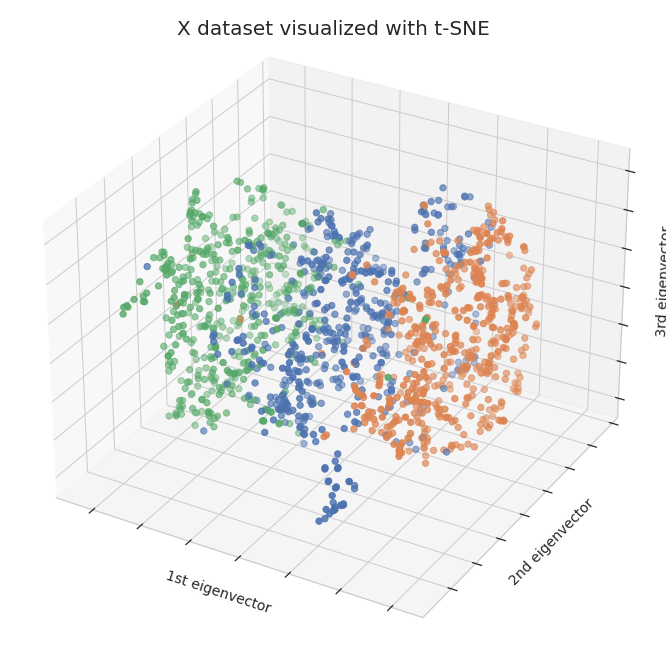

In [108]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "X dataset visualized with t-SNE")

### 3D plotting with UMAP

In [109]:
map = umap.UMAP(n_neighbors=30, n_components=3, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

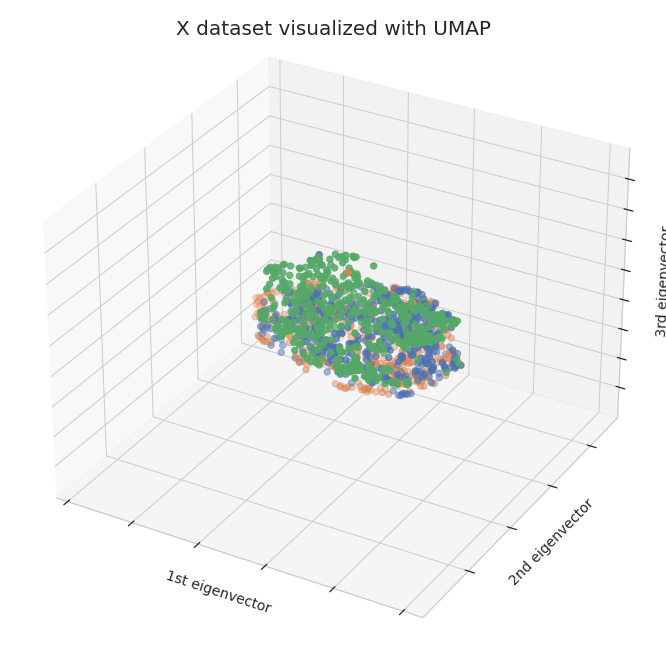

In [110]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = y,
    title = "X dataset visualized with UMAP")

## Loading IRIS the dataset

In [67]:
dataset = load_iris()

In [68]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [69]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [70]:
iris[target] = dataset.target

In [71]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Plotting first two components

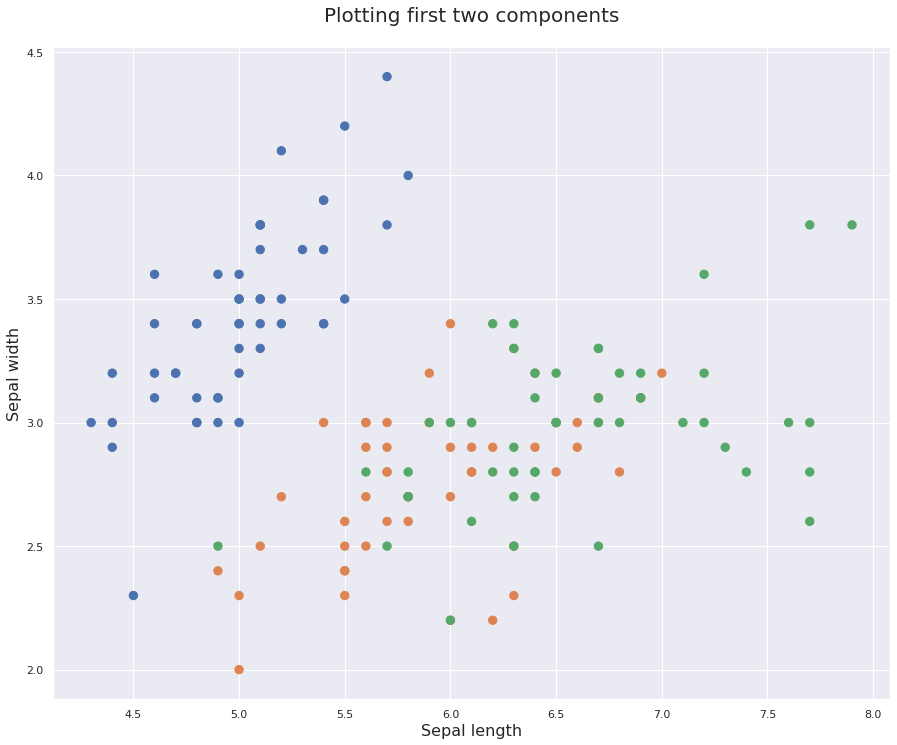

In [72]:
plot_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    c = iris['species'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

### 2D Plotting with PCA

In [73]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

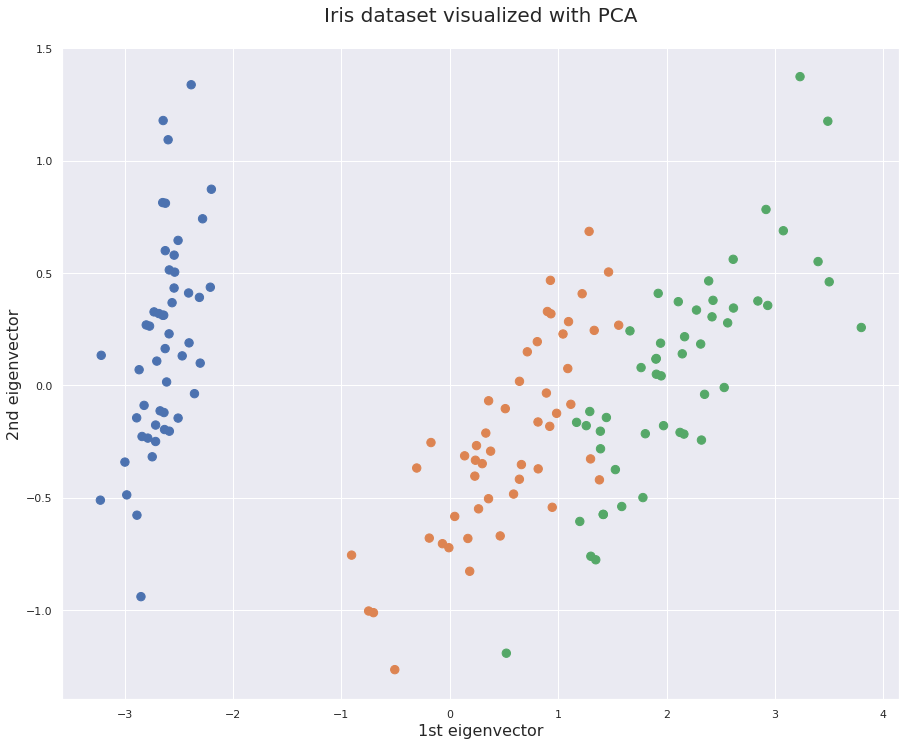

In [74]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    c = iris['species'],
    title = 'Iris dataset visualized with PCA')

### 2D plotting with t-SNE

In [75]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

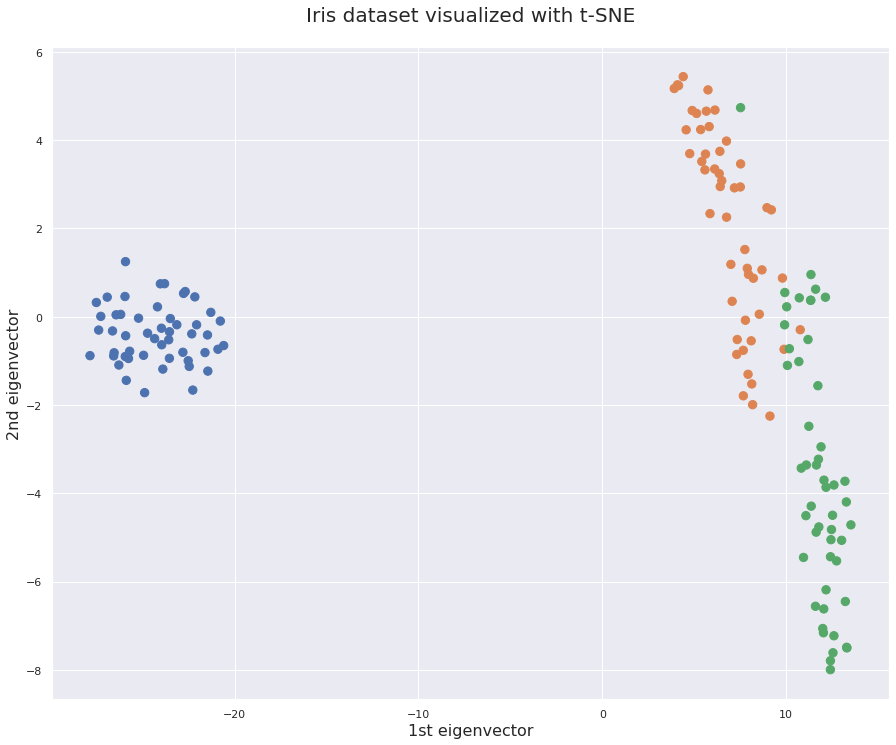

In [76]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = iris['species'],
    title = 'Iris dataset visualized with t-SNE')

### 2D plotting with UMAP

In [77]:
map = umap.UMAP(n_neighbors=30, n_components=2, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(iris[features])

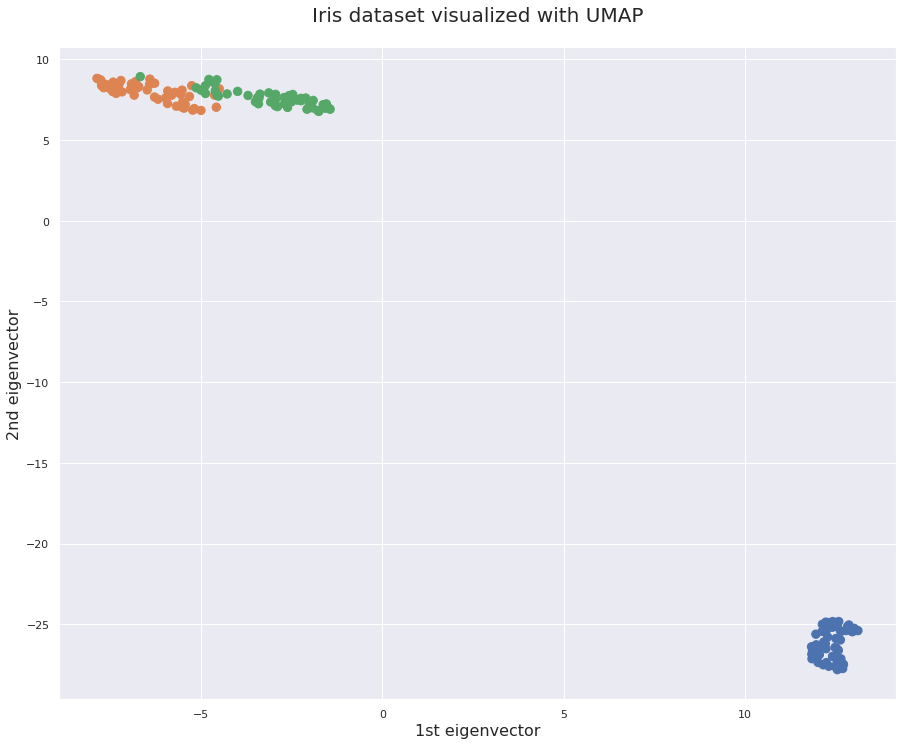

In [78]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = iris['species'],
    title = 'Iris dataset visualized with UMAP')

### 3D plotting with PCA

In [79]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

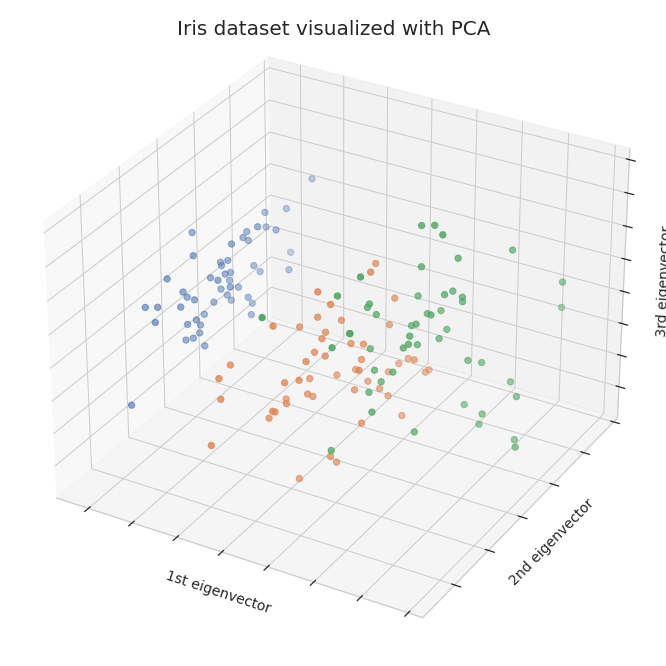

In [80]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = iris['species'],
    title = "Iris dataset visualized with PCA")

### 3D plotting with t-SNE

In [81]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

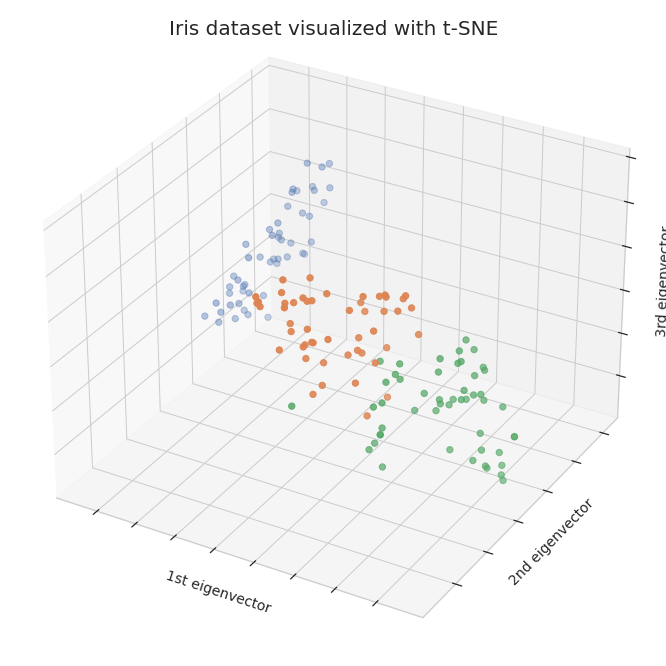

In [82]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = iris['species'],
    title = "Iris dataset visualized with t-SNE")

### 3D plotting with UMAP

In [83]:
map = umap.UMAP(n_neighbors=30, n_components=3, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(iris[features])

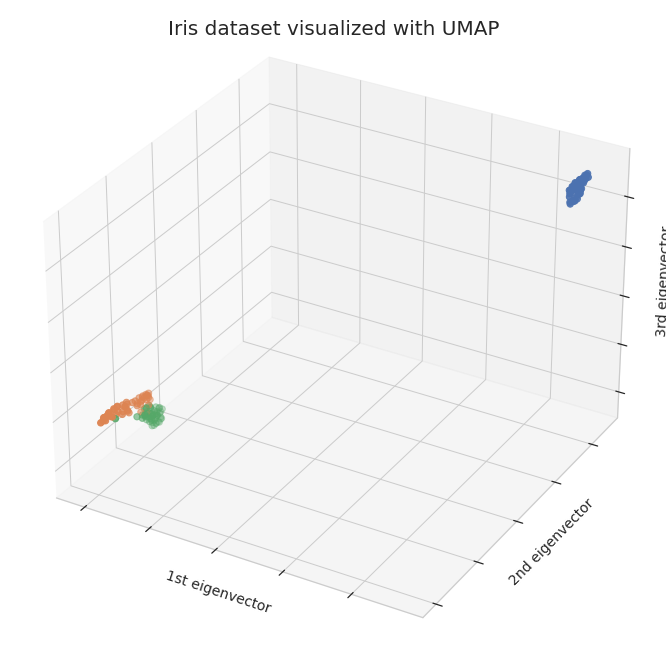

In [84]:
plot_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    c = iris['species'],
    title = "Iris dataset visualized with UMAP")

## Load MNIST Dataset

In [139]:
from sklearn import datasets
# data from sklearn datasets
X, y = datasets.load_digits(return_X_y=True, as_frame=False, n_class=10)

# Extract data & target from the dataset
y = y.astype(int)

In [140]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


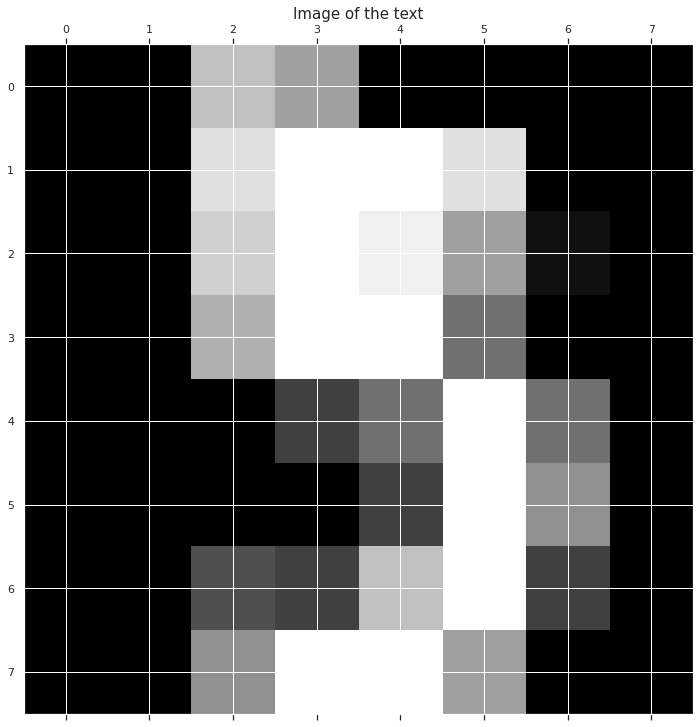

In [141]:
# Reshape the pixel data into 28x28
single_image = X[5, :].reshape(8,8)

plt.matshow(single_image, cmap='gray')
plt.title(f"Image of the text", fontsize=15)
plt.show()

### 2D Plotting with PCA

In [142]:
pca = PCA(n_components=2)
points = pca.fit_transform(X)

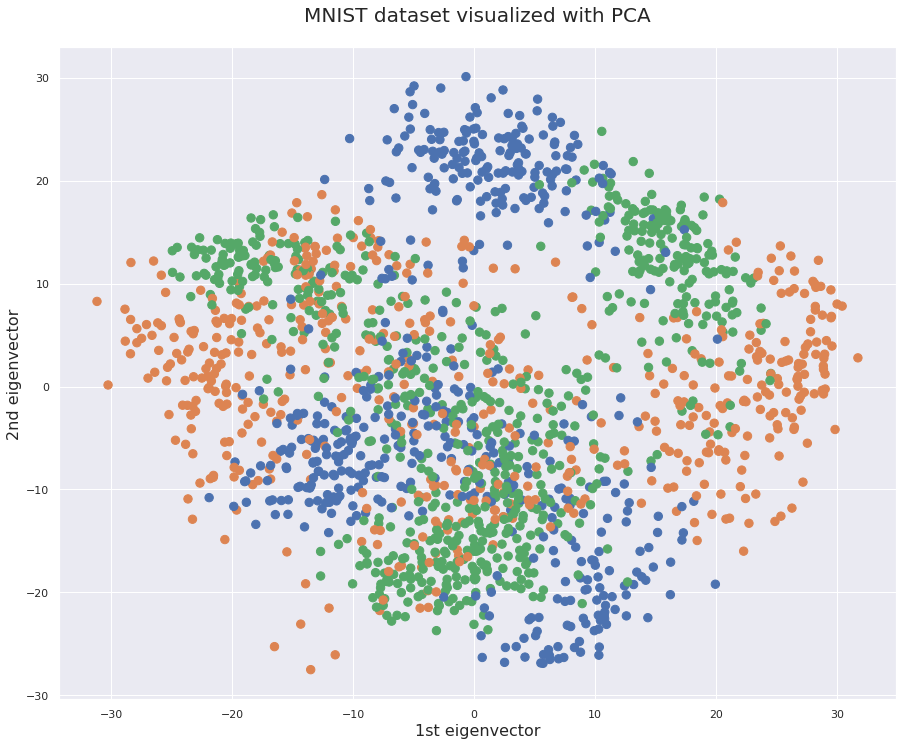

In [143]:
plot_2d(
    x = points[:,0],
    y = points[:,1],
    c = y,
    title = 'MNIST dataset visualized with PCA')

### 2D plotting with t-SNE

In [144]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(X)

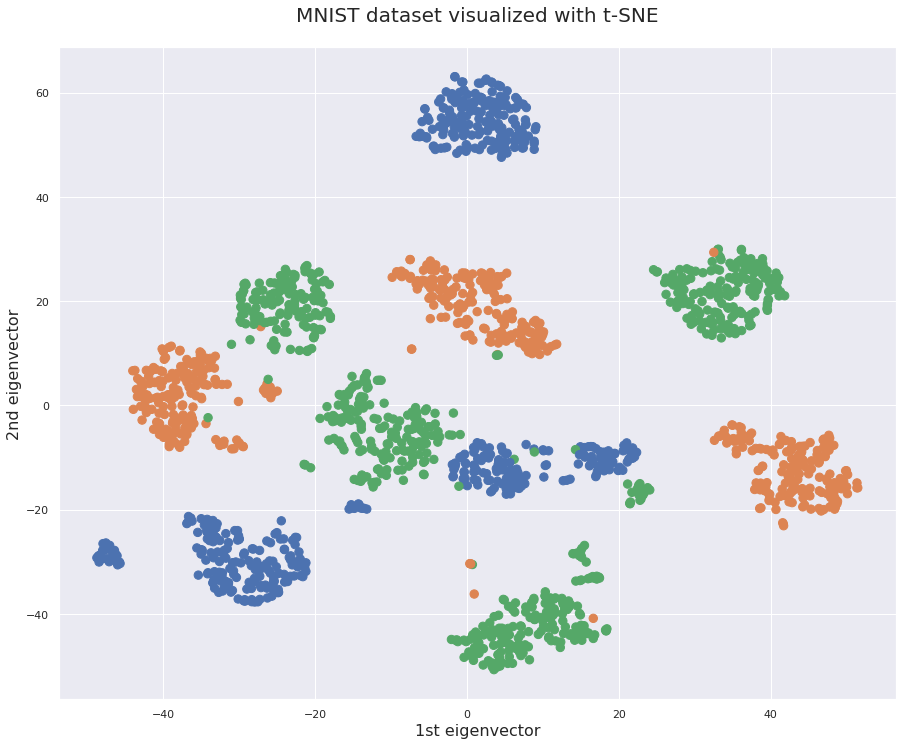

In [145]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'MNIST dataset visualized with t-SNE')

### 2D plotting with UMAP

In [146]:
map = umap.UMAP(n_neighbors=30, n_components=2, n_epochs=5000, random_state=RANDOM_STATE)
points = map.fit_transform(X)

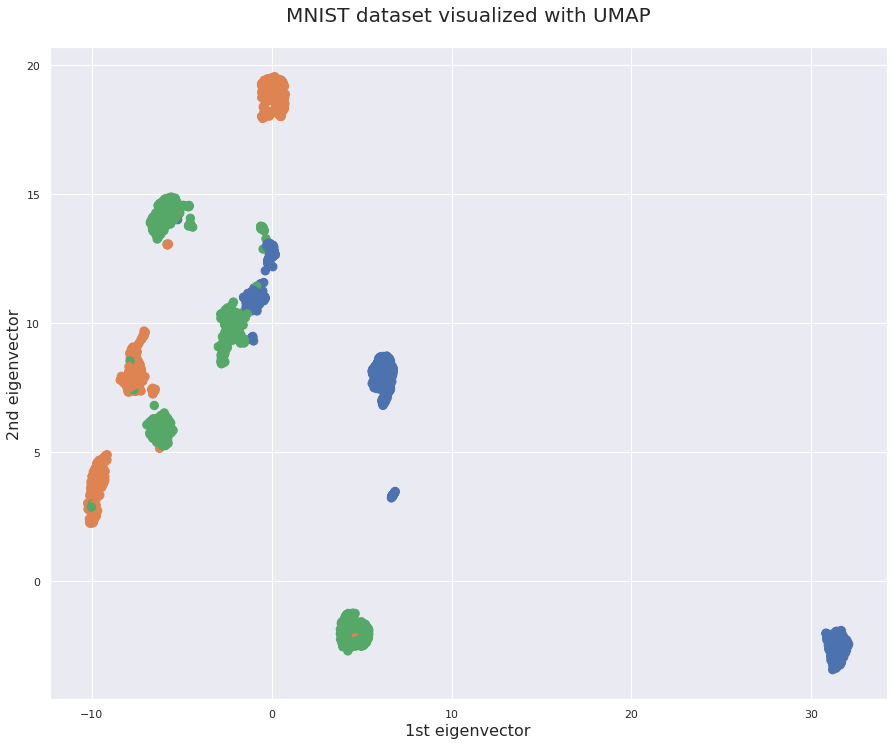

In [147]:
plot_2d(
    x = points[:, 0],
    y = points[:, 1],
    c = y,
    title = 'MNIST dataset visualized with UMAP')